In [1]:
from badsproject import BADS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
rf = BADS()
# Load and split training  and testing data and create cross validation sets from training data
rf.create_datasets(use_woe = False)
# Oversample if desired
rf.oversample()
# Run algorithm-based feature selection
rf.automagic_feature_selection()
# Print size of training sets
print(rf.X_train.shape, rf.X_test.shape, rf.X_train_cv.shape, rf.X_valid_cv.shape)


Imposing train column structure on test...
No oversampling...
No automatic feature selection...
(51884, 299) (12971, 299) (44101, 299) (7783, 299)


/home/david/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


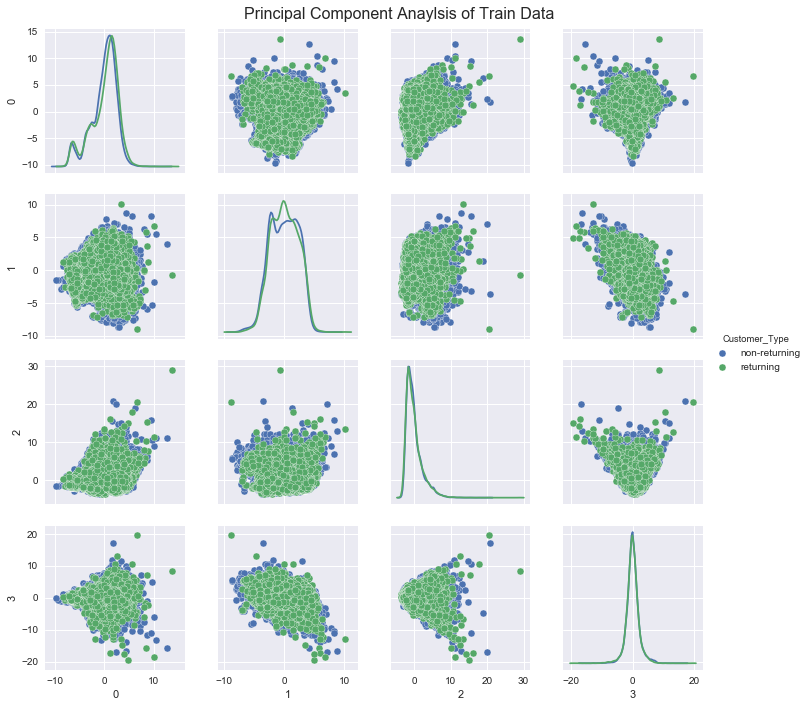

In [3]:
num_PC = 4
recalc_PC = True
train_scaled = scale(rf.X_train)

if recalc_PC:
    pca = PCA(n_components=num_PC)
    pca.fit(train_scaled)
else:
    print("Using previous eigenvectors to rotate data...")
train_rotated = pca.transform(train_scaled)
df_train = pd.DataFrame(train_rotated)
df_train["Customer_Type"] = ["returning" if y_i else "non-returning" for y_i in rf.y_train]
g = sns.pairplot(df_train, hue = "Customer_Type", diag_kind="kde", vars=range(num_PC))
g.fig.suptitle("Principal Component Anaylsis of Train Data", size=16)
g.fig.subplots_adjust(top=.95)
plt.show()

/home/david/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


Using previous eigenvectors to rotate data...


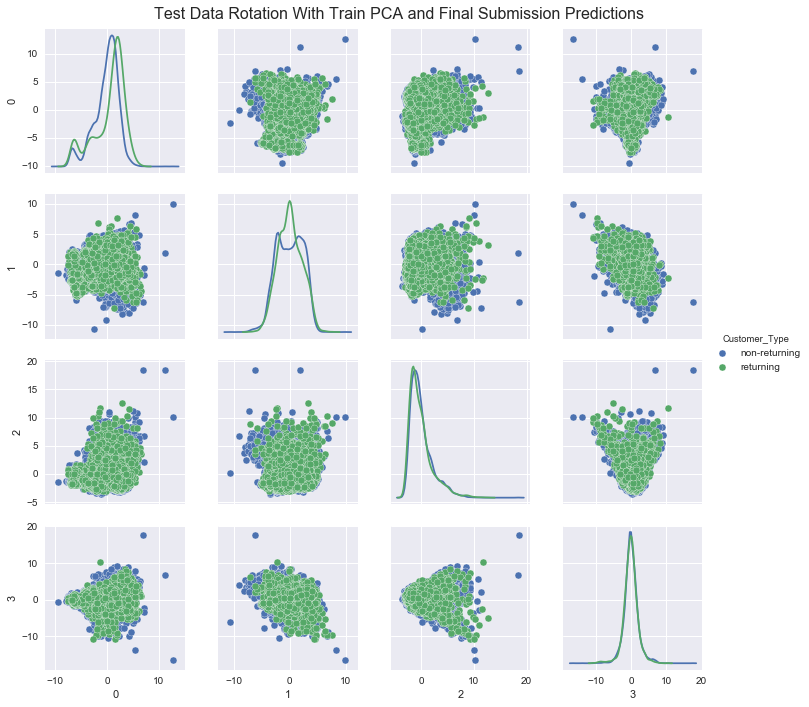

In [5]:
num_PC = 4
recalc_PC = False
X = rf.X_test
y = pd.read_csv("output/8_submitted.csv").return_customer.values

train_scaled = scale(X)


if recalc_PC:
    pca = PCA(n_components=num_PC)
    pca.fit(train_scaled)
else:
    print("Using previous eigenvectors to rotate data...")
train_rotated = pca.transform(train_scaled)
df_train = pd.DataFrame(train_rotated)
df_train["Customer_Type"] = ["returning" if y_i else "non-returning" for y_i in y]

g = sns.pairplot(df_train, hue = "Customer_Type", diag_kind="kde", vars=range(num_PC))
g.fig.suptitle("Test Data Rotation With Train PCA and Final Submission Predictions", size=16)
g.fig.subplots_adjust(top=.95)
plt.show()